In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
notebook_path = Path().absolute()
data_path = notebook_path / '..' / 'data_output' / 'image_patches_from_25_test_photos' / 'train' / 'stats.csv'

df = pd.read_csv(data_path)

# Only show summary rows (marked with **)
df = df[df['path'].str.contains('\*\*')]

# Remove the 'data_output/image_patches_from_25_test_photos/train' prefix from each path
df['path'] = df['path'].str.replace('data_output/image_patches_from_25_test_photos/train/', '')

# Remove the '/**' suffix from each path
df['path'] = df['path'].str.replace('/**', '')

# Split by detector
df_sift = df[df['detector'] == 'SIFT']
df_orb = df[df['detector'] == 'ORB']
df_akaze = df[df['detector'] == 'AKAZE']
df_brisk = df[df['detector'] == 'BRISK']

In [14]:
def show_num_features(df, detector):
    plt.figure(figsize=(18, 6))
    plt.bar(df['path'], df['r_mean'])

    plt.title(detector + ' features by patch type')
    plt.xlabel('Patch type')
    plt.ylabel('Response mean')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

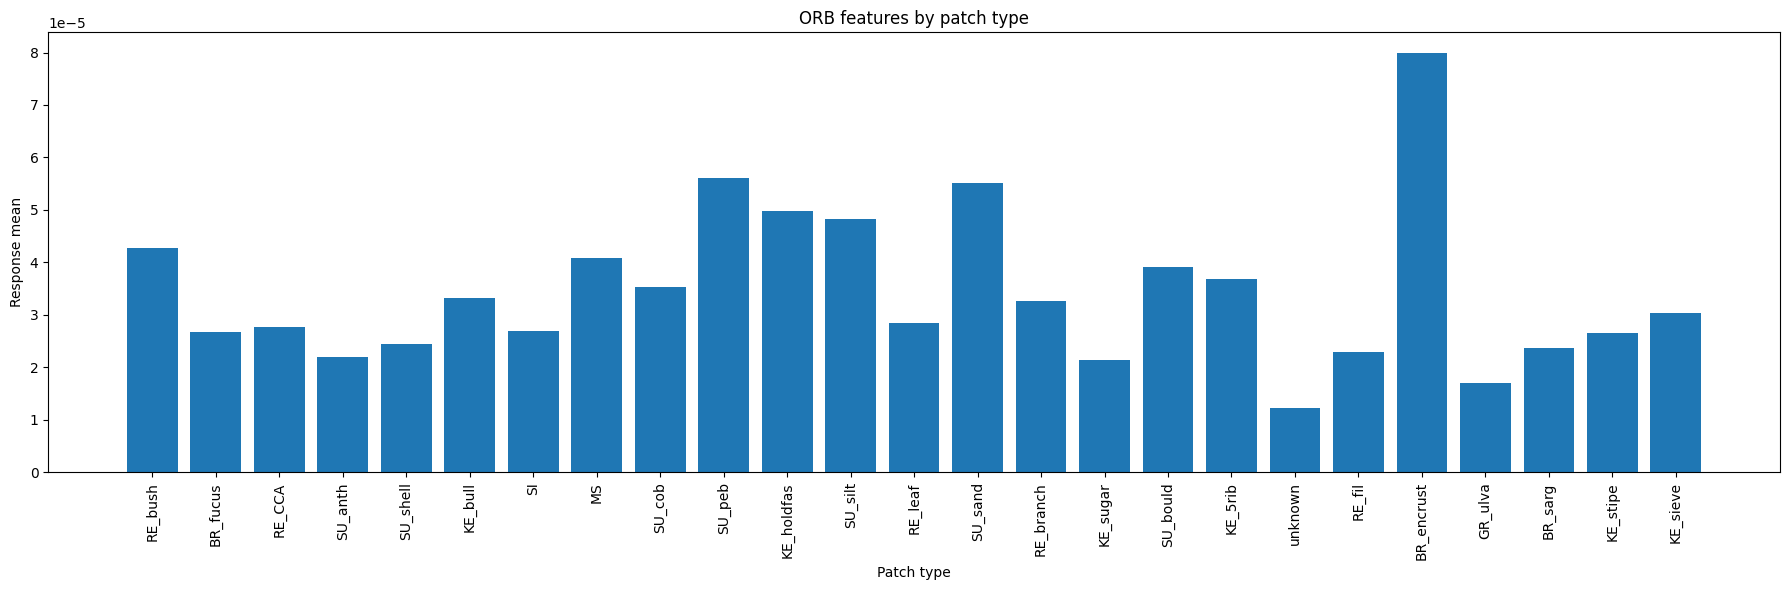

In [15]:
show_num_features(df_orb, 'ORB')

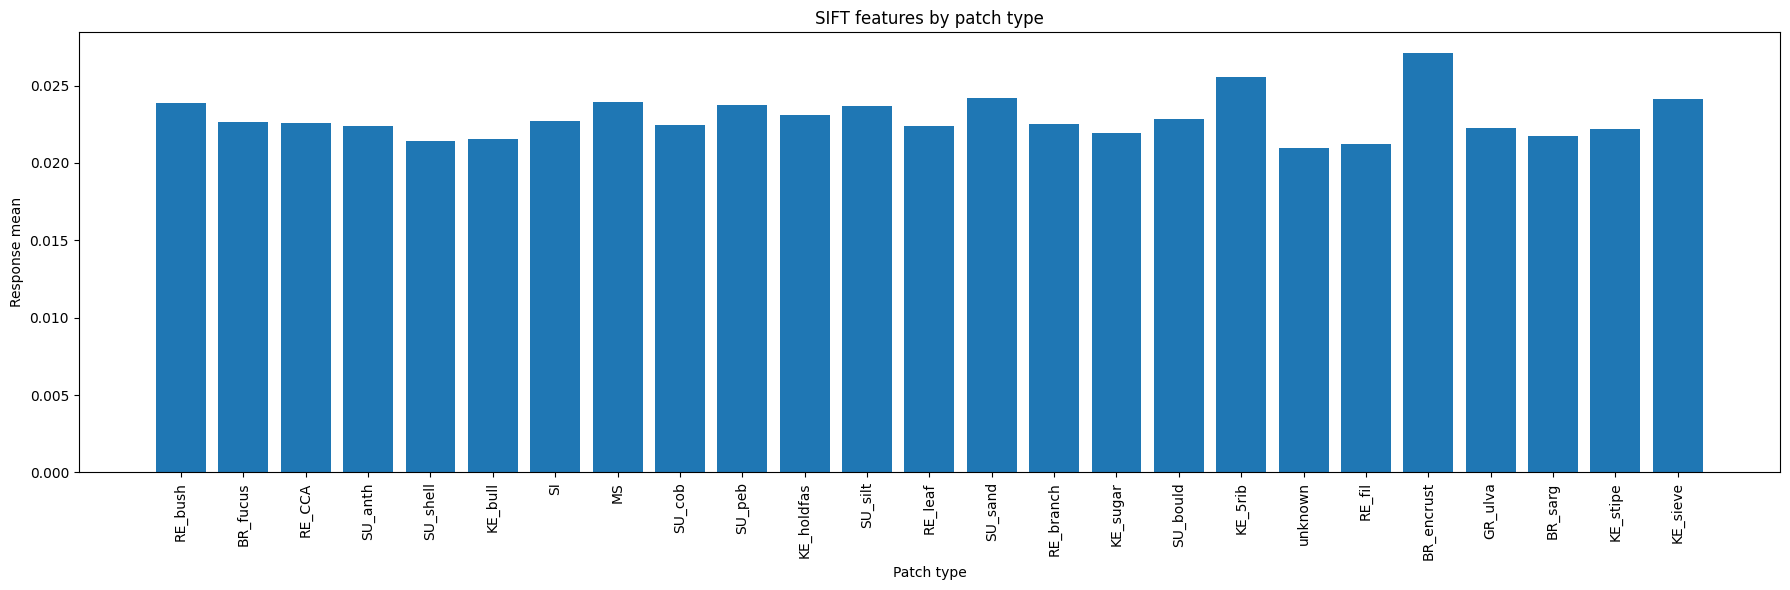

In [16]:
show_num_features(df_sift, 'SIFT')

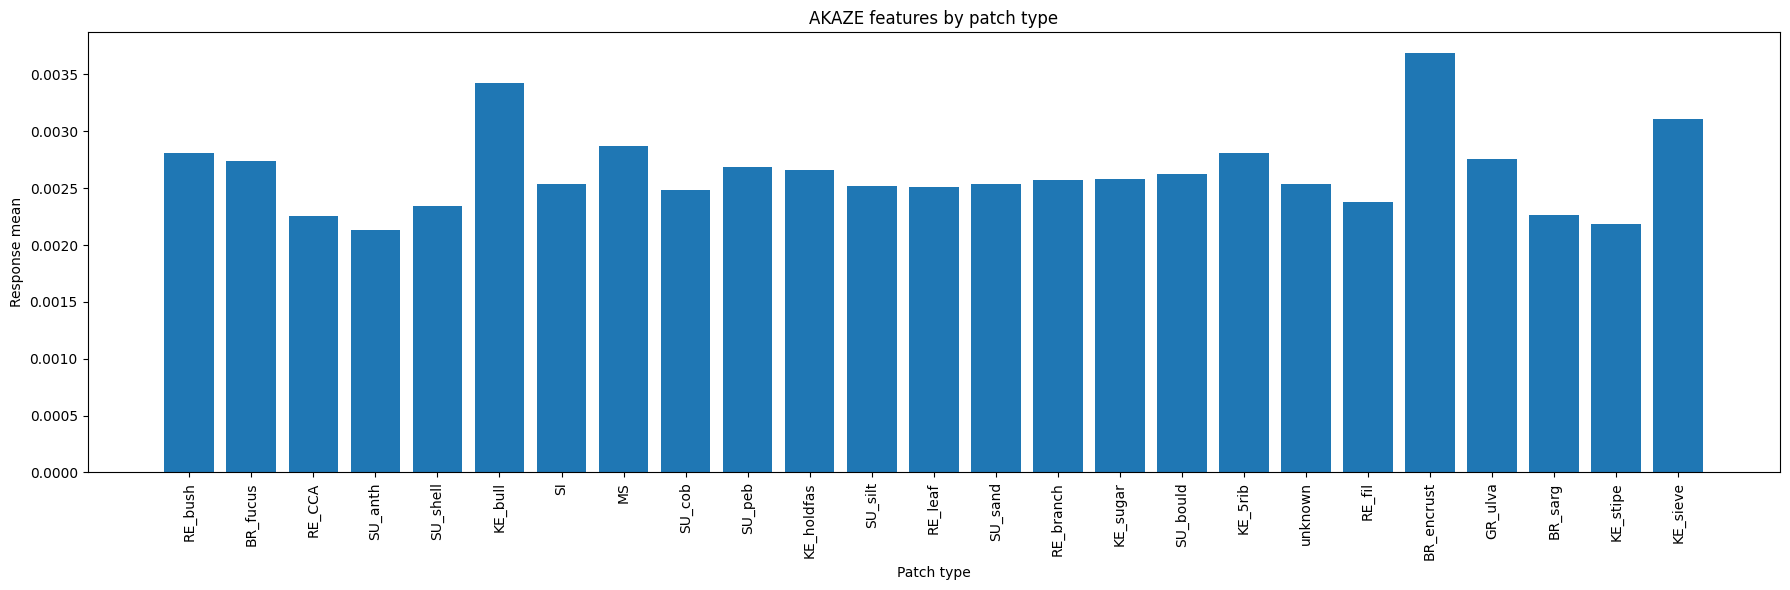

In [17]:
show_num_features(df_akaze, 'AKAZE')

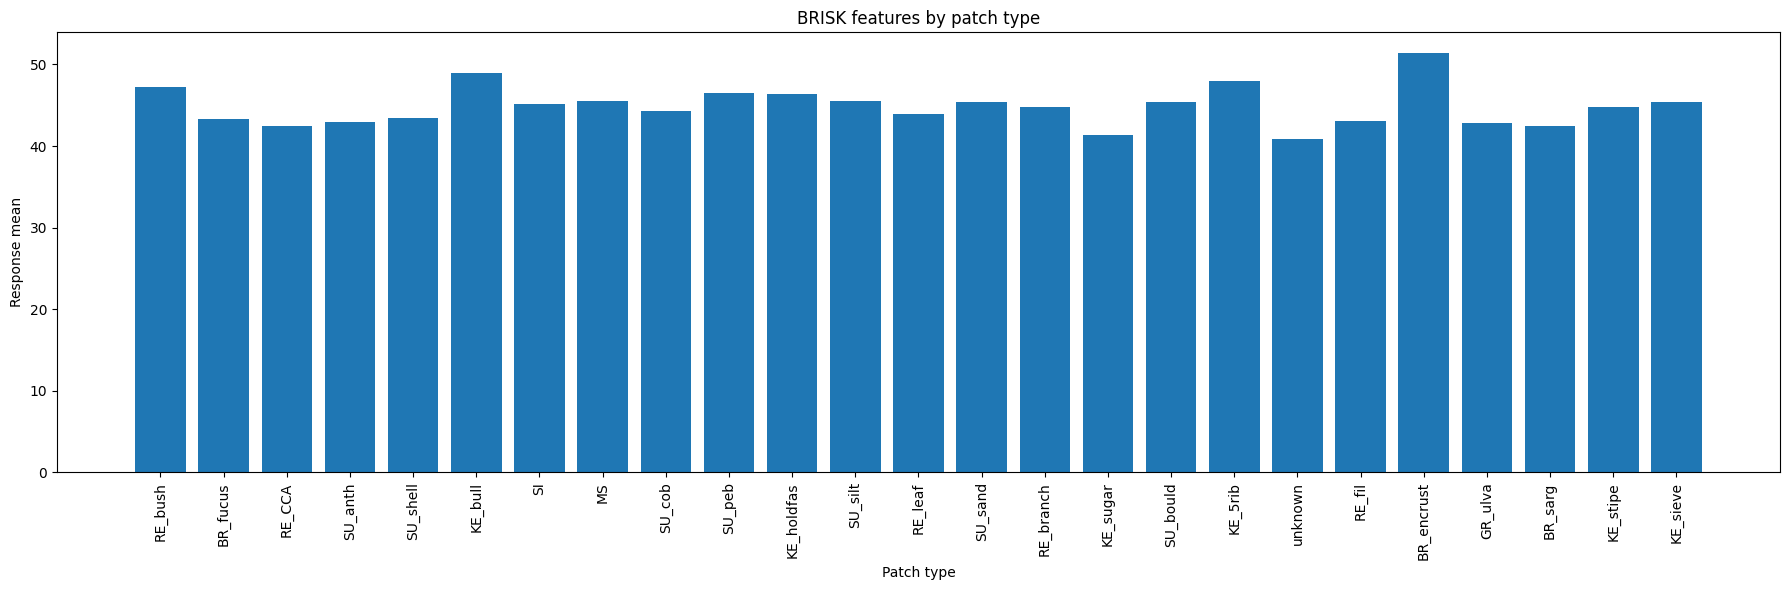

In [18]:
show_num_features(df_brisk, 'BRISK')